In [1]:
"""This is my 2nd data analysis notebook"""

'This is my 2nd data analysis notebook'

In [2]:
"""Imports"""
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
dataset = '../../data/properties_working.csv'
df = pd.read_csv(dataset)

In [4]:
df.shape

(3585, 99)

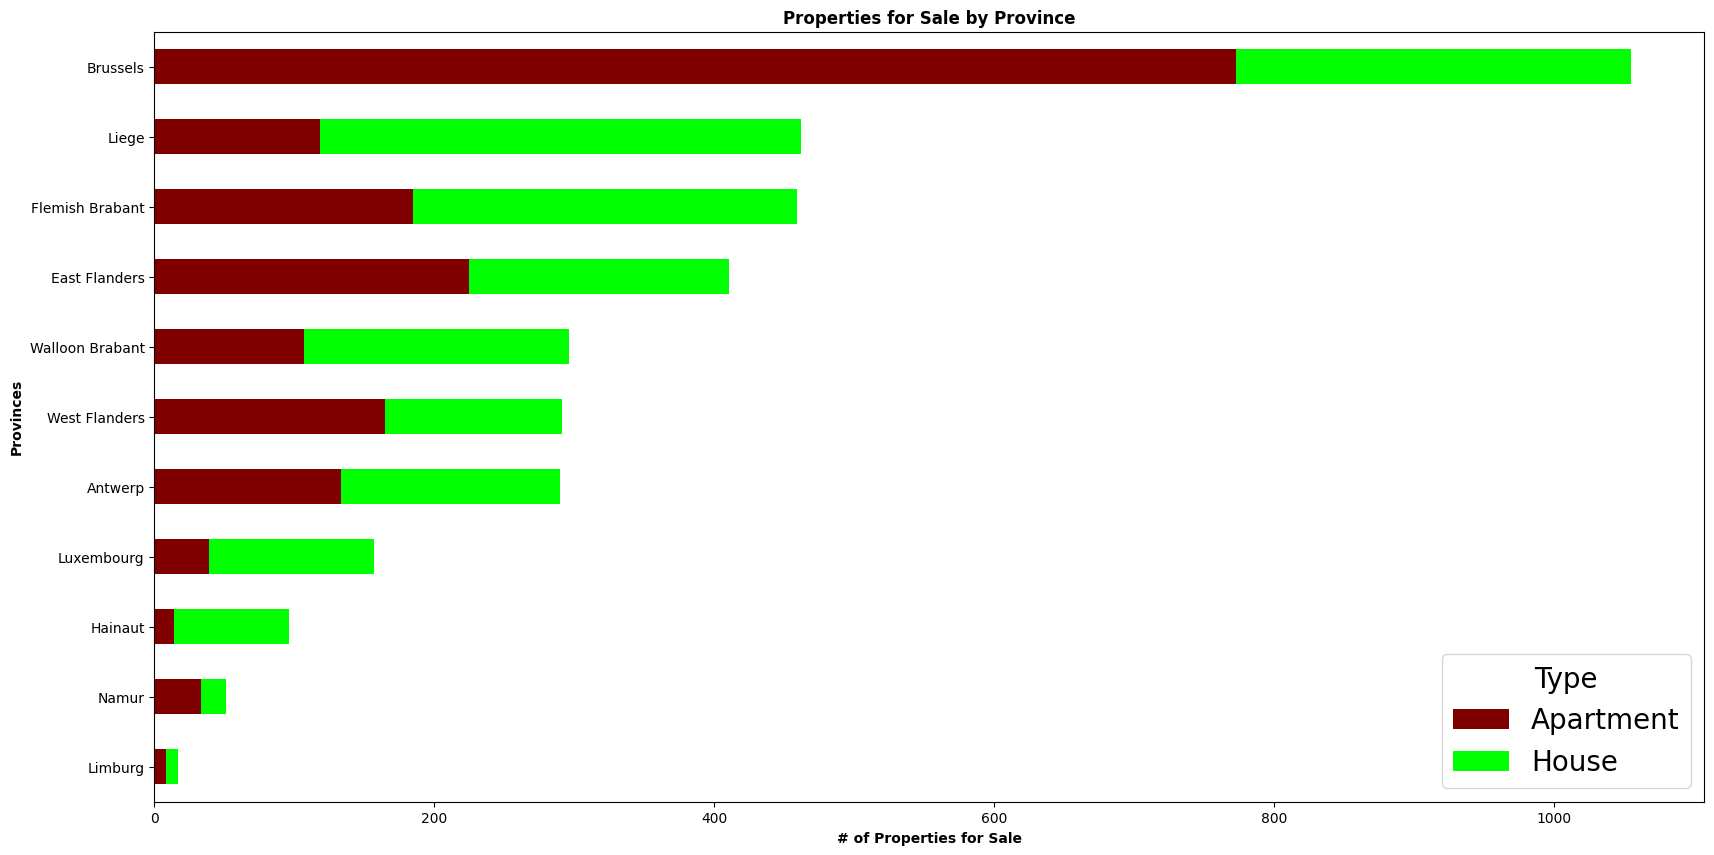

In [127]:
group = df.groupby(["province", "type"]).size().unstack()
group["total"] = group.sum(axis=1)
group.sort_values("total", inplace=True)
group[["Apartment", "House"]].plot(kind="barh", stacked=True, color=["maroon", "lime"], figsize=[20, 10])
plt.xlabel("# of Properties for Sale", fontweight="bold")
plt.ylabel("Provinces", fontweight="bold")
plt.title("Properties for Sale by Province", fontweight="bold")
plt.legend(["Apartment", "House"], title="Type", fontsize=20, title_fontsize=20)
plt.show()

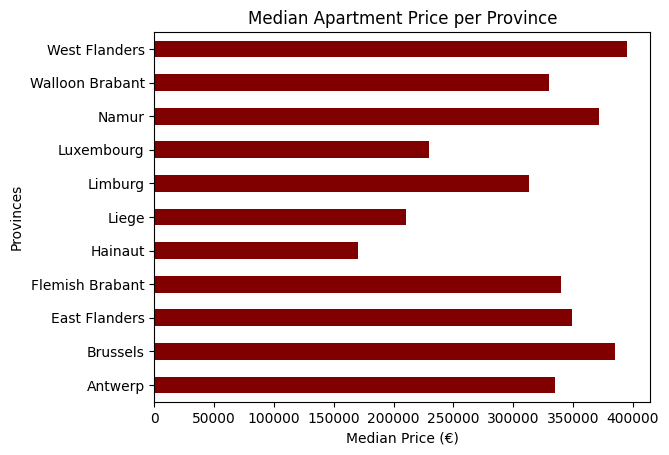

In [5]:
df_Apt = df.loc[df["type"] == "Apartment"]
df_Apt.groupby("province")["price"].median().plot(kind="barh", color="maroon")
plt.xlabel("Median Price (€)")
plt.ylabel("Provinces")
plt.title("Median Apartment Price per Province")
plt.show()

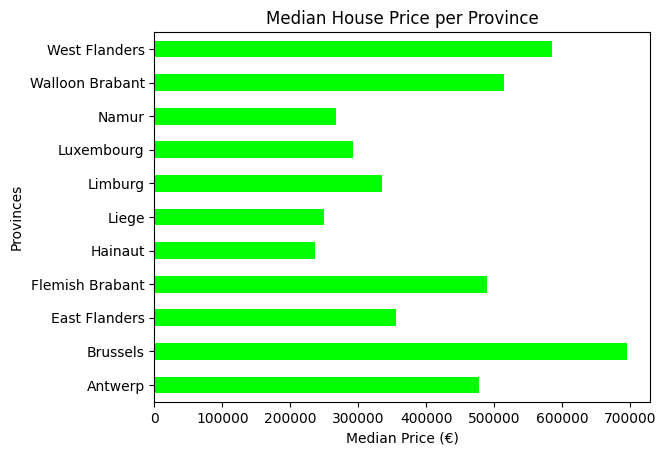

In [6]:
df_House = df.loc[df["type"] == "House"]
df_House.groupby("province")["price"].median().plot(kind="barh", color="lime")
plt.xlabel("Median Price (€)")
plt.ylabel("Provinces")
plt.title("Median House Price per Province")
plt.show()

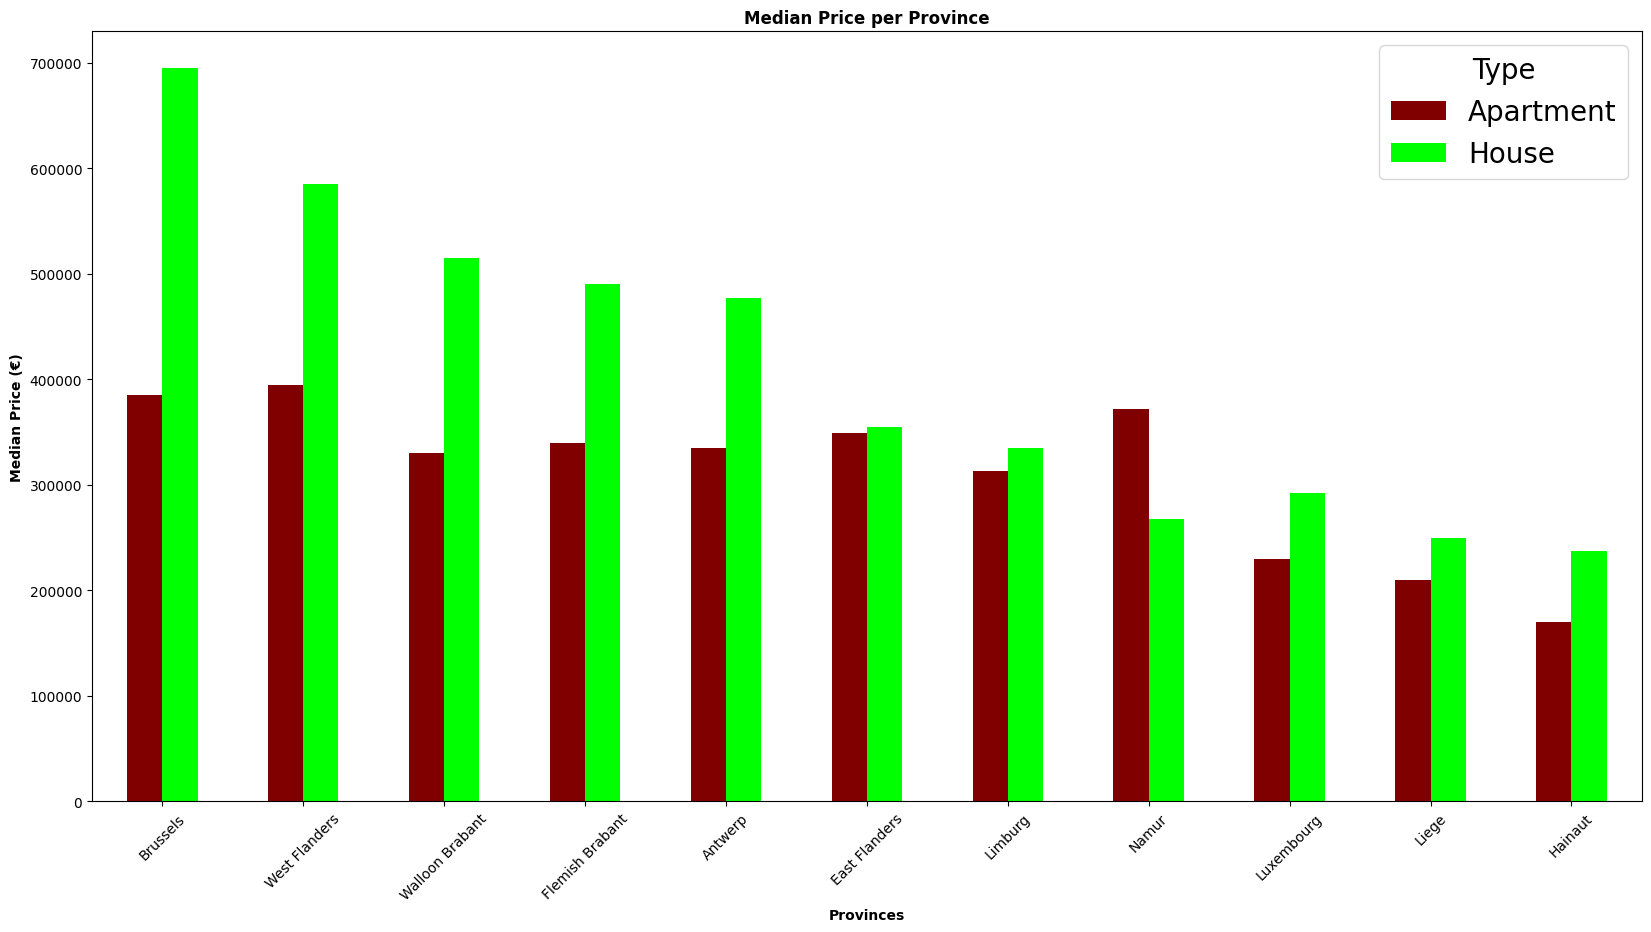

In [126]:
median_group = df.groupby(["province","type"])["price"].median().unstack()
median_group["median"] = median_group.median(axis=1)
median_group.sort_values("median", ascending=False, inplace=True)
median_group[["Apartment", "House"]].plot(kind="bar", color=["maroon", "lime"], figsize=[20, 10])
plt.xlabel("Provinces", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Median Price (€)", fontweight="bold")
plt.title("Median Price per Province", fontweight="bold")
plt.legend(["Apartment", "House"], title="Type", fontsize=20, title_fontsize=20)
plt.show()

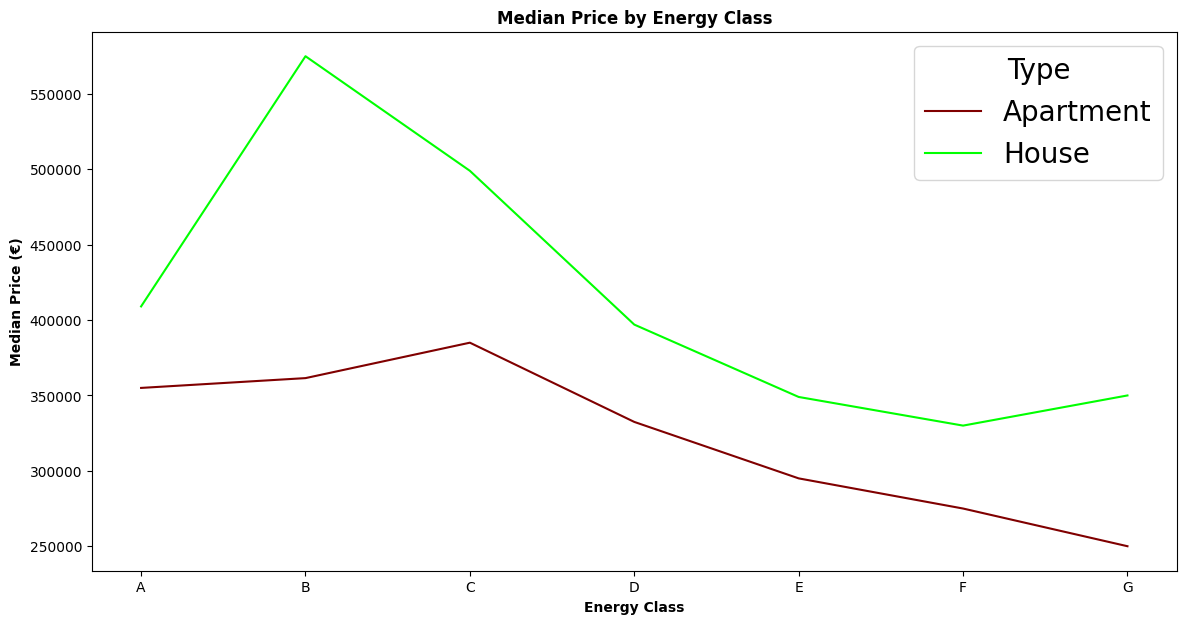

In [132]:
df_eC = df.loc[df["energyClass"] != "None"]
df_eC.groupby(["energyClass","type"])["price"].median().unstack().plot(color={"Apartment":"maroon", "House":"lime"}, figsize=[14, 7])
plt.xlabel("Energy Class", fontweight="bold")
plt.ylabel("Median Price (€)", fontweight="bold")
plt.title("Median Price by Energy Class", fontweight="bold")
plt.legend(["Apartment", "House"], title="Type", fontsize=20, title_fontsize=20)
plt.show()

In [135]:
df_eC.energyClass.value_counts()

B    515
C    439
D    429
E    331
A    310
F    299
G    267
Name: energyClass, dtype: int64

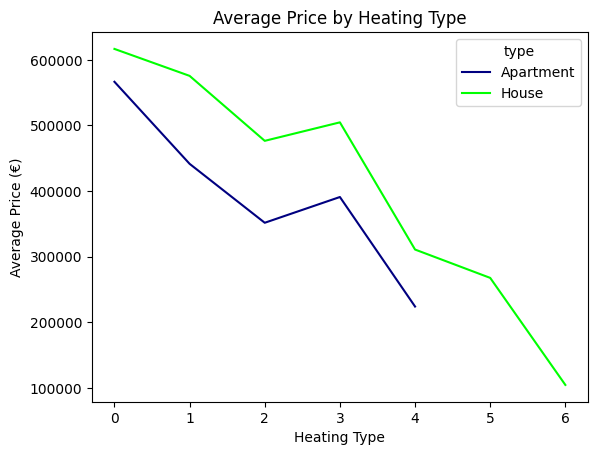

In [9]:
df_hT = df.loc[df["heatingType"] != "None"]
df_eC.groupby(["heatingType","type"])["price"].mean().unstack().plot(color={"Apartment":"navy", "House":"lime"})
plt.xlabel("Heating Type")
plt.ylabel("Average Price (€)")
plt.title("Average Price by Heating Type")
plt.show()

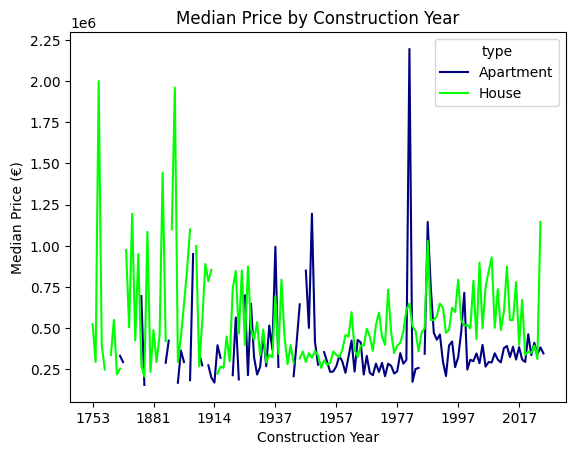

In [140]:
df_cY = df.loc[df["constructionYear"] != "None"]
df_cY.groupby(["constructionYear","type"])["price"].median().unstack().plot(color={"Apartment":"navy", "House":"lime"})
plt.xlabel("Construction Year")
plt.ylabel("Median Price (€)")
plt.title("Median Price by Construction Year")
plt.show()